# Laboratorio 3 - Algoritmos estocásticos usando cadenas de Markov

MA4402 - Simulación Estocástica: Teoría y Laboratorio

Profesor: Joaquín Fontobona T.

Auxiliares: Catalina Lizana, Álvaro Márquez, Matías Ortiz

04 de octubre de 2023

**Integrantes:**

- José Badilla
- Jorge Novoa
- Tomás Vesperinas

## Problema 1: Modelo de Ising en $\mathbb{Z}^2$

Queremos modelar el ferromagnetismo en una placa metálica plana idealizada. Específicamente para $N\in\mathbb{N}$ (grande), las moléculas de la placa se ubican en la grilla 2-dimensional $\Lambda = \Lambda_N = \{-N,\ldots,N\}^2 \subseteq \mathbb{Z}^2$, y cada molécula posee un momento magnético o _spin_, el cual puede estar orientado hacia arriba o hacia abajo. Por lo tanto, el conjunto de posibles configuraciones es $E_N = \{-1,1\}^\Lambda$. Dado $x\in E_N$, y $m\in \Lambda$, denotamos $x(m) \in \{-1,1\}$ el spin del sitio $m$ en la configuración $x$. Trabajaremos en el espacio $E$ de configuraciones con spin fijo hacia arriba en el borde:

$$ E = \{ x\in E_N : x(m)=1, \forall m\in \partial \Lambda \},
\quad \text{donde} ~
\partial \Lambda = \Lambda_N \setminus \Lambda_{N-1}.$$

En un material ferromagnético, los spins de sitios cercanos tienen tendencia a alinearse; es decir, spins iguales en sitios contiguos tienen asociada menor energía. Específicamente, la energía de una configuración $x\in E_N$ viene dada por

$$ H(x) = \sum_{m \sim m'} [ x(m) - x(m')]^2,$$

donde $m\sim m'$ denota que $m$ y $m'$ son vecinos en la grilla, es decir, que están a distancia 1 (cada par $m,m'\in \Lambda$ aparece una sola vez en la sumatoria). Supondremos que la probabilidad de que el sistema se encuentre en la configuración $x\in E$ está dada por

$$ \pi_x = \frac{e^{-\beta H(x)}}{Z(\beta)},$$

para $\beta>0$ dado ($1/\beta$ es la temperatura), y $Z(\beta) = \sum_{y\in E} e^{-\beta H(y)}$ es la constante de normalización. Observe que lo anterior hace improbables las configuraciones con mayor energía, lo cual es consecuente con lo que ocurre en los sistemas físicos. Se desea simular realizaciones de la distribución $\pi \in \mathcal{P}(E)$.

> 1.1 - Calcule $|E|$. Argumente por qué es imposible en la práctica calcular $Z(\beta)$ explícitamente, incluso para $N$ pequeño (por ejemplo, $N=10$).

*Respuesta*: Para calcular $|E|$ calcularemos, $|\Lambda|$, para esto, basta notar que:

$$ |\Lambda| = |\{ -N, \dots, N\} \times \{ -N, \dots, N\}| = |\{ -N, \dots, N\}|^2 = (2 N + 1)^2 $$

luego, es claro que:

$$ |\partial \Lambda| = |\Lambda_N| - |\Lambda_{N-1}| = (2 N + 1)^2 - (2 (N-1) + 1)^2 = (2 N + 1)^2 - (2 N -1)^2 $$

Por lo tanto, como el cardinal de $E_N$ corresponde al numero de $x \in E_N$ tales que los $ m \in \partial \Lambda$ ya esten fijos, por lo tanto, se tendra que:

$$ |E| = |\{-1,1\}|^{|\Lambda| - |\partial \Lambda|} = 2^{(2 N + 1)^2 - (2 N + 1)^2 + (2 N -1)^2 } = 2^{(2 N -1)^2} $$

A partir de esto, es claro que es imposible en la practica calcular $Z(\beta)$ explicitamente, puesto que habria que hacer $|E|$ sumas, pero, como se puede observar, para un $N$ pequeño, por ejemplo: $N = 10$, se tiene que:

$$ |E| = 2^{19^2} \approx 4.697085\cdot 10^{108} $$

como se puede observar, es una cantidad enorme y eso que solo consideramos $N=10$, lo que implica que para $N$ de mayor tamaño el cálculo explicito de $Z(\beta)$ tomara una cantidad seguramente poco computable por su tamaño.

**Respuesta**:

Debido a lo anterior, no es posible simular $\pi$ directamente. Por este motivo, utilizaremos un algoritmo tipo _Markov chain Monte Carlo_ (MCMC) para realizar simulaciones aproximadas de $\pi$, según lo descrito en cátedra. Para esto, siga los siguientes pasos.

Consideremos el grafo $G$ sobre $E$ en el cual $xy$ es una arista de $G$ si y sólo si $x$ e $y$ difieren en exactamente un sitio, es decir, si y sólo si
$$ \exists m_0 \in \Lambda \setminus \partial \Lambda,
	\text{ tal que }
	x(m_0) = -y(m_0),
	\text{ y además }
	x(m) = y(m), \forall m\neq m_0. $$

> 1.2 - Escriba la matriz estocástica $R$ asociada a este grafo para el algoritmo de Metropolis y el de Gibbs. Obtenga una expresión explícita simple para $\frac{\pi_y R_{yx}}{\pi_x R_{xy}}$ en ambos casos ¿Cuál algoritmo es más conveniente usar y por qué?

La matriz de R de Gibbs es 
$$
R^{G}(x,y) =
\begin{cases}
  \pi_{y} \left(\sum_{\mathrm{z ∼ x}} \pi_{z} \right)^{-1}, & \text{si x ∼ y}\\
  0, & \text{si no}
\end{cases}
$$
Que reemplazando sería:

$$
R^{G}_{xy} =
\begin{cases}
  e^{-\beta H(y)} \left(\sum_{\mathrm{z ∼ x}} {e^{-\beta H(z)}}\right)^{-1}, & \text{si x ∼ y}\\
  0, & \text{si no}
\end{cases}
$$

Mientras que la matriz de metrópolis sería:

$$
\pi^{xy} =
\begin{cases}
  \frac{1}{deg_x}, & \text{si x ∼ y}\\
  0, & \text{si no}
\end{cases}
$$

Es decir, como hay $8N$ nodos en el borde, la cantidad de nodos en el interior serían $(2N+1)^2-8N = (2N-1)^2$, que serían la cantidad de vecinos de una matriz (cambiando cualquiera de los valores del interior de la matriz).

$$
R^{M}_{xy}
=
\begin{cases}
  \frac{1}{(2N-1)^2}, & \text{si x ∼ y}\\
  0, & \text{si no}
\end{cases}
$$

Ver que si x es vecino de y, entonces

$$
\frac{\pi_{y} R^M_{yx}}{\pi_{x} R^M_{xy}} = e^{-\beta (H(y) - H(x))}
$$

$$
\frac{\pi_{y} R^G_{yx}}{\pi_{x} R^G_{xy}} = \frac{ e^{-\beta H(y)} \left(\sum_{\mathrm{z ∼ y}} e^{-\beta H(z)} \right) } {e^{-\beta H(x)}  \left(\sum_{\mathrm{z ∼ x}} {e^{-\beta H(z)}}\right)}
$$

Gracias a la simplicidad en el cálculo, la matriz R de Metrópolis debe ser la más eficiente computacionalmente, por lo que debería ser mejor.

**Respuesta**:

> 2 - Describa el algoritmo MCMC correspondiente a este caso usando pseudo-código. En base a él, programe un método $X=$`Ising(N,beta,nf)` que simule $nf$ pasos de la cadena, grafique su estado cada cierta cantidad de pasos (mostrando la grilla $\Lambda$ y asociando un color al spin $-1$ y otro a $1$), y retorne el estado final $X$, en caso que $nf$ sea finito. Escoja los spins iniciales independientes con ley $2\cdot\text{Bernoulli}(p)-1$, para algún $p\in(1/2, 1)$ (por ejemplo $p=2/3$ ó $p=3/4$). Haga esto para 2 valores de $p$ distintivos. Comente la diferencia o similitud observadas entre ambos casos y la relevancia de dicha elección. Fije un valor para todo lo que viene.

Describiremos el algoritmo MCMC mediante el siguiente pseudo-código:

#### Pseudocodigo del Algoritmo MCMC para $ (X_n)_{n \in \mathbb{N}}$
1. `Input`: $N$, $\beta$ y $nf$

2. `Output`: $nf$ pasos de la cadena $(X_n)_{n \in \mathbb{N}} \sim CdM(μ, P)$

3. Estado Inicial $\leftarrow$ Matriz de dimension $2N + 1$ con spin en el borde = 1 y con Ley 2 Bernoulli(p) - 1
   en las demas casillas de tener un spin 1 o -1.

4. $X_0$ $\leftarrow$ Estado Inicial

5. $nf$ uniformes $U_k, V_k$

6. Para $n$ (`indice`) en $[0,nf-1]$:
   - $x \leftarrow X_n $
   
   - $Y_{n+1} \leftarrow f(V_{n+1}, X_n)$ ($f$ funcion de transicion)

   - Si se verifica $U_{n+1} \leq \frac{\pi_y R_{yx}}{\pi_x R_{xy}}$:
      - $X_{n+1} \leftarrow Y_{n+1} $
   - Si no:
      - $X_{n+1} \leftarrow x $


7. Fin del algoritmo.

In [1]:
import numpy as np
def crear_EN(N: int, p: float):
    '''
    Inicia con binomial(0.2), y coloca 1 en los bordes de la matriz cuadrada, y 0 en los demás. 

    Parámetros
    ----------
    N : int
        Tamaño de la matriz

    p : float
        Parámetro de la Bernoulli.

    Retorno
    -------
    E : np.ndarray
        Matriz con 1 en los bordes y 0 en el interior.
    
    Ejemplo
    -------
    >>> crear_EN(4, 0.5)
    array([[ 1,  1,  1,  1],
       [ 1,  1,  1,  1],
       [ 1,  1, -1,  1],
       [ 1,  1,  1,  1]]) 
    '''
    E = 2 * np.random.binomial(1, p, (N,N)) - 1
    
    for i in range(N):
        E[0, i] = 1
        E[i, 0] = 1
        E[-1, i] = 1
        E[i, -1] = 1
    return E

def son_vecinos(x: np.ndarray, y: np.ndarray):
    '''
    Revisa si las matrices x,y son vecinos (difieren en un solo valor en el interior).

    Parámetros
    ----------
    x : np.ndarray
        Matriz 1.
    y : np.ndarray
        Matriz 2.
    
    Retorno
    -------
    bool_son_vecinos : bool
        True o False si son vecinos o no.

    Ejemplo
    -------
    >>> x = np.array([[ 1,  1,  1,  1],
       [ 1,  1,  1,  1],
       [ 1,  1, -1,  1],
       [ 1,  1,  1,  1]])
    >>> y = np.array([[ 1,  1,  1,  1],
        [ 1,  1,  1,  1],
        [ 1,  1, -1,  1],
        [ 1,  1,  1,  1]])
    >>> son_vecinos(x,y)
    True
    '''
    N = len(x)
    son_vecinos = True

    # Revisar si son iguales
    if np.all(x == y) == True:
        son_vecinos = False

    else:
        # Revisar si difieren en más de 1 punto
        diff_count = 0
        for i in range(N):
            for j in range(N):
                if x[i, j] != y[i, j]:
                    diff_count += 1

                    # Si hay más de una diferencia, retornar False
                    if diff_count > 1:
                        son_vecinos = False
    return son_vecinos

def numero_de_vecinos(N: int):
    '''
    Retorna el número de vecinos de una matriz de NxN.

    Parámetros
    ----------
    N : int
        Tamaño matriz, que debe ser mayor a 3.
    
    Retorno
    -------
    cantidad_vecinos : int
        Cantidad de vecinos.
    
    Ejemplo
    -------
    >>> numero_de_vecinos(5)
    9
    '''
    cantidad_de_nodos_en_borde = 4*N - 4
    cantidad_total_de_nodos = N**2
    cantidad_vecinos = cantidad_total_de_nodos - cantidad_de_nodos_en_borde
    return cantidad_vecinos

def funcion_R_metropolis(x, y):
    '''
    Crea la función asociada a la matriz estocástica R, asociada al grafo G según el algoritmo de Metropolis.

    Parámetros
    ----------
    x : np.ndarray
        Matriz de -1 y 1
    y : np.ndarray
        Matriz de -1 y 1
    
    Retorno
    -------
    valor_R : np.ndarray
        Valor R[x,y] asociada a la matriz estocástica R, asociada al grafo G.
    
    Ejemplo
    -------
    >>> x = np.array([[ 1,  1,  1,  1],
       [ 1,  1,  1,  1],
       [ 1,  1, -1,  1],
       [ 1,  1,  1,  1]])
    >>> y = np.array([[ 1,  1,  1,  1],
            [ 1,  1,  1,  1],
            [ 1,  -1, -1,  1],
            [ 1,  1,  1,  1]])
    >>> funcion_R_metropolis(x, y)
    0.25
    '''
    N = len(x)
    if son_vecinos(x,y) == True:
        valor_R = 1 / numero_de_vecinos(N)
    else:
        valor_R = 0
    return valor_R

In [2]:
def funcion_transicion(R, x: np.ndarray) -> int:
    '''
    Función de transición asociada a la función R (representando matriz estocástica), es decir, f: E x [0,1]^n -> E.
    Realiza un solo paso.

    Parámetros
    ----------
        R : function
            Función asociada a la matriz estocástica de transición.
        x : np.ndarray
            Nodo inicial.

    Retorno
    -------
        nodo_actual : np.ndarray
            Nodo al que transiciona finalmente.
        
    Ejemplo
    -------
    >>> ejemplo_R = lambda x,y: 0.4
    >>> ejemplo_x = np.ones(shape=(5,5))
    >>> funcion_transicion(ejemplo_R, ejemplo_x, ejemplo_u)
    array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1., -1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])
    '''
    n = len(x)
    nodo_final = np.copy(x)
    i = np.random.randint(1, n-2)
    j = np.random.randint(1, n-2)
    nodo_final[i,j] = -nodo_final[i,j]
    return nodo_final

def funcion_H(x: np.ndarray):
    '''
    Función H.

    Parámetros
    ----------
    x : np.ndarray
        Parámetro.

    Retorno : float
        Valor H(x) en los reales.
    '''
    N = len(x)
    suma = 0

    # Se suma derecha y abajo 
    for i in range(N - 1):
        for j in range(N - 1):
            suma += (x[i,j] - x[i+1, j])**2 + (x[i,j] - x[i, j+1])**2

    # Se rellena la última fila y última columna
    for i in range(N - 1):
        suma += (x[N-1,i] - x[N-1, i+1])**2 + (x[i, N-1] - x[i+1, N-1])**2
    return suma

def Ising(n: int, beta: float, nf: int, p=2/3):
    # n, beta, nf
    '''
    Usando el método de Metropolis-Hasting, simula una CdM(μ, P) con P asociada a la distribución invariante pi.

    Parámetros
    ----------
    n : int
        Número de nodos desde -n, ..., 0 ,..., n.

    beta : float
        Parámetro de

    nf : int
        Número de pasos a simular.

    Retorno
    -------
    X : np.ndarray
        Arreglo con los valores de la CdM en cada paso.
    
    Ejemplo
    -------
    >>> nodos = 7
    >>> pasos = 8
    >>> beta = 1.2
    >>> X = Ising(nodos, beta, pasos, p=0.6)

    >>> for i in range(pasos-1):
    >>>     fila, columna = np.where(X[i+1]-X[i])
    >>>     print(f"[i],[j] = {fila},{columna}")
    '''
    u = np.random.uniform(size=nf)

    # Estado inicial
    X0 = crear_EN(2*n + 1, p)
    X = []
    X.append(X0) # Nodo actual
    for n in range(nf - 1): 
        Y = funcion_transicion(funcion_R_metropolis, X[0])
        if u[n+1] <= np.exp(- beta * (funcion_H(Y) - funcion_H(X[0]))):
            X = [Y]
    return X


In [3]:
import matplotlib.pyplot as plt
def plotear_cadena(X):
    '''
    Grafica una cadena cada N pasos. Blanco es 1 y negro es -1.

    Parámetros
    ----------
    X : list
        Arreglo que representa la cadena de Markov.
    N : int
        Cada cuántos pasos se plotea.

    Retorno
    -------
    None
    '''
    plt.figure(figsize=(6, 6))
    plt.imshow(X[0], cmap='gray', vmin=-1, vmax=1, origin='lower')
    plt.colorbar()
    plt.title(f"Estado final de la Cadena de Markov de Ising")
    plt.xlabel("Columnas")
    plt.ylabel("Filas")
    plt.show()
    return 

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from IPython.display import display, clear_output

def plotear_cadena_animacion(X, N: int, beta):
    '''
    Grafica una cadena cada N pasos. Blanco es 1 y negro es -1.

    Parámetros
    ----------
    X : list
        Lista de estados que representan la cadena de Markov.
    N : int
        Cada cuántos pasos se plotea.

    Retorno
    -------
    None
    '''

    for i, estado in enumerate(X):
        if (i + 1) % N == 0 or i == 0:
            plt.figure(figsize=(6, 6), facecolor='white')  # Establece el fondo blanco
            plt.imshow(estado, cmap='gray', vmin=-1, vmax=1, origin='lower')
            plt.colorbar()
            plt.title(f"Estado {i+1} de la Cadena para Beta = {beta}")
            plt.xlabel("Columnas")
            plt.ylabel("Filas")

            # Muestra la figura en el entorno
            display(plt.gcf())
            clear_output(wait=True)
            plt.close()


In [41]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from IPython.display import display, clear_output

def plotear_cadena_animacion_1(X, N: int, p):
    '''
    Grafica una cadena cada N pasos. Blanco es 1 y negro es -1.

    Parámetros
    ----------
    X : list
        Lista de estados que representan la cadena de Markov.
    N : int
        Cada cuántos pasos se plotea.

    Retorno
    -------
    None
    '''

    for i, estado in enumerate(X):
        if (i + 1) % N == 0 or i == 0:
            plt.figure(figsize=(6, 6), facecolor='white')  # Establece el fondo blanco
            plt.imshow(estado, cmap='gray', vmin=-1, vmax=1, origin='lower')
            plt.colorbar()
            plt.title(f"Estado {i+1} de la Cadena para p = {p}")
            plt.xlabel("Columnas")
            plt.ylabel("Filas")

            # Muestra la figura en el entorno
            display(plt.gcf())
            clear_output(wait=True)
            plt.close()


Interpretemos. Probemos con $p = 0.6$ y $p=0.9$.

In [27]:
nodos = 50
pasos = 100
beta = 1.2

X_1 = Ising(nodos, beta, pasos, p=0.6)
X_2 = Ising(nodos, beta, pasos, p=0.9)

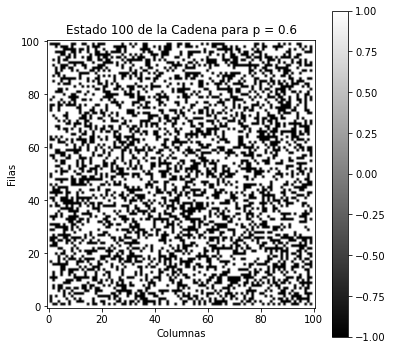

In [43]:
plotear_cadena_animacion_1(X_1,5, 0.6)

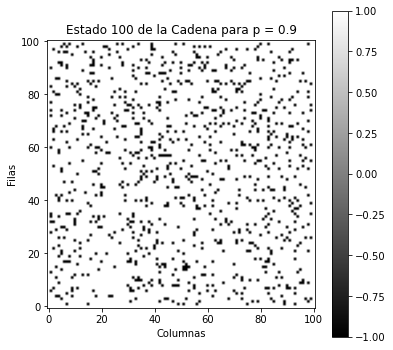

In [44]:
plotear_cadena_animacion_1(X_2,5, 0.9)

In [52]:
print(f"Número de transiciones para p = 0.6:  {cantidad_de_transiciones(X_1)}")
print(f"Número de transiciones para p = 0.9:  {cantidad_de_transiciones(X_2)}")

Número de transiciones para p = 0.6:  68
Número de transiciones para p = 0.9:  14


Se observa que a medida que $p$ aumenta, hay menos cambios en la cantidad de nodos. Esto se debe a que el algoritmo de Metropolis rechaza más frecuente porque la comparación se vuelve más exigente. Es por ello que se debe escoger un valor de $p$ representativo para el problema (ya sea si los spins son propensos a cambiar en cada paso o no).

Fijaremos el valor $p=0.75$, un valor intermedio para tener un equilibrio entre los cambios, de modo que cambie a veces, y otros no.

En lo que sigue, fije $N \in \{50,\ldots,200\}$ (lo más grande que se pueda, mientras la simulación sea fluida).

> 3 -  Observe el comportamiento de la cadena en el tiempo largo para un $\beta$ pequeño y otro grande (digamos, escoja un $\beta<0.1$ y otro $\beta>5$). Grafique y comente.

In [32]:
print("### Loading ###")
Cadena1 = Ising(50, 0.09, 10000, p=3/4)
print("### Primera cadena completada ###")
Cadena2 = Ising(50, 7, 10000, p=3/4)
print("### Completado! ###")

### Loading ###
### Primera cadena completada ###
### Completado! ###


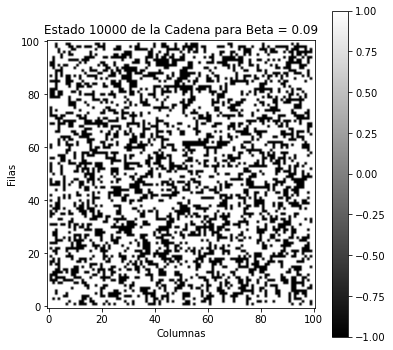

In [49]:
plotear_cadena_animacion(Cadena1, 250, 0.09)

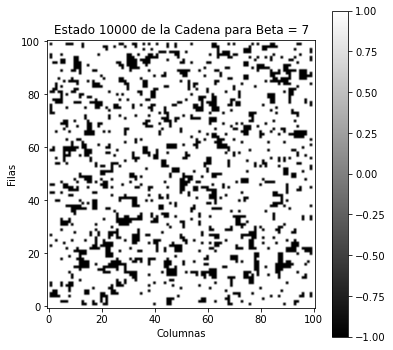

In [50]:
plotear_cadena_animacion(Cadena2, 250, 7)

Se puede apreciar que para $ \beta < 0.1$ hay mas spins hacia arriba en la gran mayoria de espacios que en el caso $\beta > 5$, junto con ser mas homogeneo (en relacion a la cantidad de spins arriba vs spins abajo).

Lo observado en el punto anterior se conoce como _transición de fase_: existe un valor crítico $\beta_C>0$ tal que para cualquier $\beta>\beta_C$ y $N$ grande, $\pi$ asigna probabilidad casi 1 a configuraciones con spin hacia arriba en la gran mayoría de los sitios (con la condición de borde que usamos), mientras que cuando $\beta<\beta_C$ se observa coexistencia de ambos spins. A continuación estudiaremos este fenómeno.

> 4.1 - Fije $nf$ grande (en el orden de los millones), de modo que el algoritmo tenga tiempo de acercarse a $\pi$. Fije una malla del intervalo $[0,1]$ de distintos valores de $\beta$. Para cada $\beta$ en la malla, obtenga el estado $X$ de la cadena luego de $nf$ pasos, y calcule el _spin medio_ $s = \frac{1}{|\Lambda|} \sum_{m\in \Lambda} X(m)$. Grafique $s$ en función de $\beta$, y estime visualmente el valor crítico $\beta_C$.

In [18]:
N = 50
beta_array = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
ultimo_estado_por_beta = []
for beta in beta_array:
    print(f"Corriendo para {beta}")
    ultimo_estado_por_beta.append(Ising(N, beta, 100000, 3/4)[-1])

Corriendo para 0.1
Corriendo para 0.2
Corriendo para 0.3
Corriendo para 0.4
Corriendo para 0.5
Corriendo para 0.6
Corriendo para 0.7
Corriendo para 0.8
Corriendo para 0.9


In [19]:
spin_medio_por_beta = []
for i in range(len(beta_array)):
    spin_medio_por_beta.append(np.sum(ultimo_estado_por_beta[i]) / (2*N + 1)**2)
print(spin_medio_por_beta)

[0.06479756886579748, 0.5355357317910009, 0.9237329673561415, 0.9511812567395354, 0.9637290461719439, 0.983138907950201, 0.9817664934810313, 0.9829428487403196, 0.972943829036369]


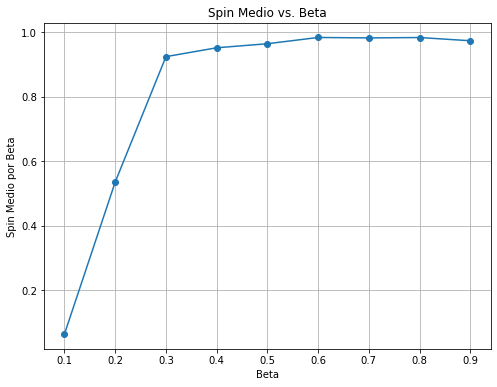

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(beta_array, spin_medio_por_beta, marker='o', linestyle='-')

# Personalizar el gráfico
plt.title('Spin Medio vs. Beta')
plt.xlabel('Beta')
plt.ylabel('Spin Medio por Beta')
plt.grid(True)

# Mostrar el gráfico
plt.show()

A partir del grafico, podemos estimar que $\beta_C$ se debe encontrar cerca del intervalo $(0.2, 0.4)$, por lo que escogeremos por ahora $\beta_C \approx 0.3$, aunque faltaria refinar el intervalo y calcular el spin medio para mejorar la aproximacion de $\beta_C$.

> 4.2 - Repita lo anterior en un intervalo más pequeño centrado en su estimación de $\beta_C$, y con $nf$ más grande aún, de modo de obtener una estimación más fina. Grafique. Averigüe el valor exacto de $\beta_C$ y compárelo con su estimación.

In [26]:
N = 50
beta_fino = [0.25, 0.35, 0.45]
ultimo_estado_por_beta_fino = []
for beta in beta_fino:
    print(f"Corriendo para {beta}")
    ultimo_estado_por_beta_fino.append(Ising(N, beta, 100000, 3/4)[-1])

Corriendo para 0.25
Corriendo para 0.35
Corriendo para 0.45


In [27]:
spin_medio_por_beta_fino = []
for i in range(len(beta_fino)):
    spin_medio_por_beta_fino.append(np.sum(ultimo_estado_por_beta_fino[i]) / (2*N + 1)**2)
print(spin_medio_por_beta_fino)

[0.7827663954514263, 0.9594157435545535, 0.9770610724438781]


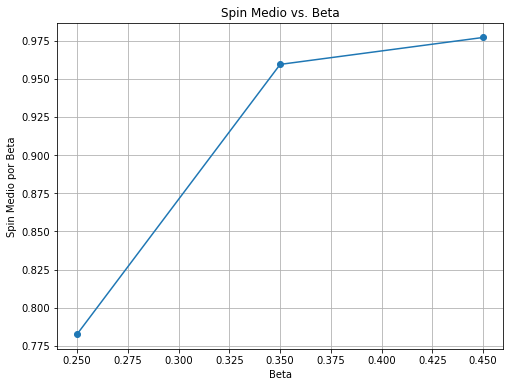

In [28]:
plt.figure(figsize=(8, 6))
plt.plot(beta_fino, spin_medio_por_beta_fino, marker='o', linestyle='-')

# Personalizar el gráfico
plt.title('Spin Medio vs. Beta')
plt.xlabel('Beta')
plt.ylabel('Spin Medio por Beta')
plt.grid(True)

# Mostrar el gráfico
plt.show()

A partir de esto, encontramos que el $\beta_C$ se debe encontrar en el intervalo $(0.25, 0.35)$, por lo que mantenemos el valor aproximado de $\beta_C \approx 0.3$.

Teoricamente se encontro que $\beta_C \approx 0.441$, por lo que nuestra aproximacion se encontraba un poco alejada del valor "correcto" de $\beta_C$, esto se lo podemos atribuir a que la cantidad de nodos aun sigue siendo pequeña al igual que los $nf$ pasos como para poder ver correctamente donde se encuentra el $\beta_C$.

## Problema 2 - Problema del vendedor viajero

Considere un conjunto $\{1,2,...,N\}$ de ciudades en el dominio plano $[0,1]^2$. El problema del vendedor viajero consiste en encontrar un ciclo que recorra todas las ciudades una y solo una vez, partiendo y terminando en la primera, que
minimice la distancia recorrida.

Sea $E=\{\sigma \in S_{N}:\sigma (1)=1\}$ el conjunto de todas las posibles rutas que empiezan en $1$. Es fácil verificar que $|E| =(N-1)!,$ por lo que si consideramos el problema con $15$ ciudades, la cantidad de rutas posibles es 87.178.291.200, por lo cual es claro que es prácticamente imposible recorrer todas las posibilidades. La idea es construir un algoritmo estocástico, denominado _recocido simulado (simulated annealing)_, para minimizar la función de distancia total recorrida

$$ w(\sigma )=\sum_{i=1}^{N}d(\sigma (n),\sigma (n+1)) $$

en donde $d:\{1,...,N\}^{2}\rightarrow \mathbb{R}_{+}$ es la distancia euclidiana usual entre dos ciudades, y se usa la convención $\sigma(N+1)=1$ para $\sigma \in E.$ Definimos el grafo $G$ sobre $E$ dado por la siguiente relación de adyacencia: $\sigma \sim \tau$ si y sólo si $\tau$ se obtiene permutando exactamente 2 ciuidades de $\sigma$.

> 1.1 - Programe una función que genere $N$ ciudades uniformemente distribuidas en $[0,1]^{2},$ y que genere luego la matriz $D=(D_{ij})_{i,j=1}^{N}$ de distancias, donde $D_{ij}$ es la distancia entre	la ciudad $i$ y la ciudad $j$.

In [30]:
import matplotlib.pyplot as plt

def generate_city(N):
    cities = np.zeros((N,2))
    distances = np.zeros((N,N))
    for i in range(N):

        #generamos las tuplas (x,y) con x,y pertencientes a una uniforme 0,1
        pos = np.random.uniform(0,1,(2,1))
        cities[i][0] = pos[0]
        cities[i][1] = pos[1]
    #calculamos la distancia euclidiana entre los elementos
    for i in range(N):
        for j in range(N):
            if i != j:
                c1 = cities[i]
                c2 = cities[j]
                distances[i][j] = np.linalg.norm(c1-c2)
    return(cities,distances)

> 1.2 - Se define $osc_{K}(w)=\max \{w(\tau)-w(\sigma) : \sigma \sim \tau \}$. Dé una cota superior para $osc_{K}(w)$ para cada $N$, que no dependa de la posición de las ciudades.

**Respuesta**:

Primero, observemos que para $\sigma \sim \tau$ :

$$ w(\tau) - w(\sigma) = \sum_{i=1}^{N} d(\tau(i), \tau(i+1)) - d(\sigma(i), \sigma(i+1)) $$

entonces, ya que $\sigma \sim \tau$, tenemos que difieren a lo mas en 4 aristas, esto es resultado de la diferencia en la permutacion, supongamos que difieren en $k,j$, así:

$$ \sum_{i=1}^{N} d(\tau(i), \tau(i+1)) - d(\sigma(i), \sigma(i+1))  = d(k-1,k) - d(k-1,j) + d(j-1,k) - d(j-1,j) $$

Notemos que ya que los puntos estan acotados en $[0,1]^2$, entonces la maxima distancia (euclideana) posible es $\sqrt{2}$, por lo cual:

$$ w(\tau) - w(\sigma) = d(k-1,k) - d(k-1,j) + d(j-1,k) - d(j-1,j)  \leq 2 \sqrt{2} $$

**Respuesta**:

> 2 - Programe una función que dado un camino que recorre las $N$ ciudades, en el orden dado por la permutación $\sigma$, grafique dicho camino.

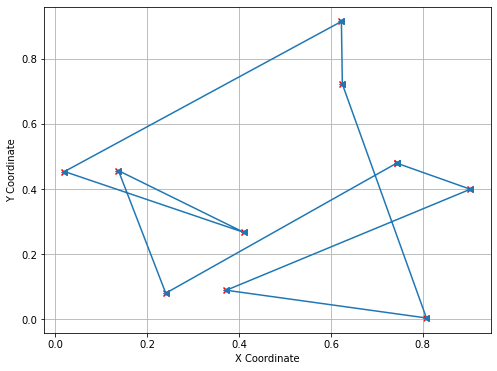

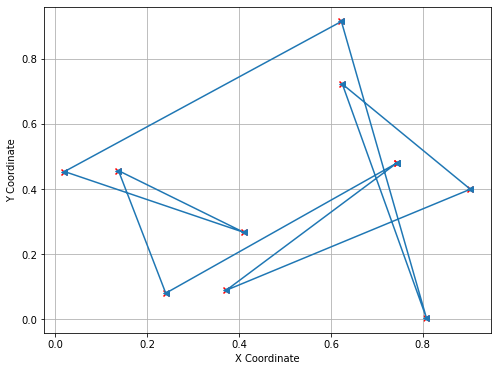

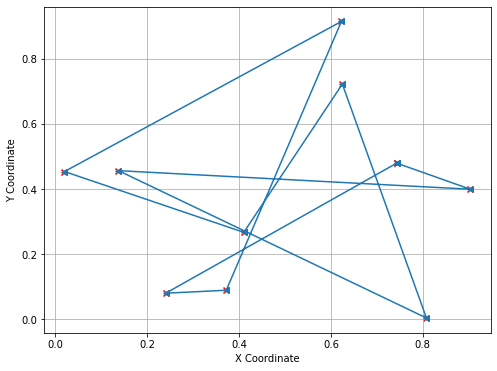

In [31]:
def travel_plot(permutacion,N,cities,distances):
    #la permutación es una lista [] por ej [2 1 3 4]
    unos = np.ones(N)
    permutacion = permutacion-unos
    permutacion = permutacion.astype(int)
    x = [cities[i][0] for i in permutacion]
    y = [cities[i][1] for i in permutacion]
    
    x.append(cities[0][0])
    y.append(cities[0][1])
    plt.figure(figsize=(8, 6))
    
    plt.scatter(x, y, c='red', marker='x')
    plt.plot(x, y, marker='<', linestyle='-')    
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid()
    plt.show()

    
(gotham,calles) = generate_city(10)
travel_plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],10,gotham,calles)


travel_plot([1, 3, 2, 5, 4, 6, 7, 8, 9, 10],10,gotham,calles)


travel_plot([1, 2, 9, 4, 5, 8, 7, 6, 3, 10],10,gotham,calles)

Considere una sucesión de temperaturas inversas $\beta_n = \frac{1}{C}\ln(n+e)$ con $C>(N-1)osc_{K}(w)$ y una cadena de Markov $(X_n)$ no homogénea tal que, en el tiempo $n$, su matriz de transición está dada por la matriz de la cadena $(X_k^{\beta_n})$, según el método visto en cátedra. Es decir: dado $X_n = \sigma$, se escoge un vecino $\tau \sim \sigma$ uniformemente al azar, y con probabilidad $e^{-\beta_n (w(\tau) - w(\sigma))} \wedge 1$ se define $X_{n+1} = \tau$; si no, se mantiene $X_{n+1} = \sigma$. Se puede probar que dicha cadena converge en probabilidad a una variable aleatoria distribuida uniformemente en el conjunto de mínimos globales de la función $w$. 

> 3 - Implemente un método que simule esta cadena para un estado inicial que usted escoja.

Notemos que dado la cota encontrada para $osc_{k}(w)$, tenemos que:

$$
(N-1)osc_{k}(w) < 2(N-1)\sqrt{2}
$$

así consideramos $C = 3(N-1)\sqrt{2}$ el cual cumple acotar superiormente a $(N-1)osc_{k}(w)$.

In [32]:
#Definimos la función beta a utilizar:
def func_beta(n,N):
    C = 2*(N-1)*(np.sqrt(2))+0.001
    D = 1/C
    return D*np.log(n+np.exp(1)) 


In [33]:
#Dos configuraciones son vecinas si dos ciudades estan cambiadas
#da vuelta dos nodos al azar, pero el primero se mantiene
def neighborhood(p):
    k = p
    i = np.random.randint(1,len(p))
    j = np.random.randint(1,len(p))
    var = k[i]
    k[i] = k[j]
    k[j] = var
    return k

In [34]:
#Definimos la función de costo w
#en este caso es la suma de la distancia euclidiana del trayecto
#es necesario agregar el camino del ultimo elemento al 1er nodo
def fn_costos(permutacion,distance):
    largo = 0
    N = np.shape(distance)[0]
    #modificamos los indices del trayecto para que coincida con el orden de numpy
    unos = np.ones(N)
    permutacion = permutacion-unos
    permutacion = permutacion.astype(int)
    for i in range(N):
        pos_ini =permutacion[i]
        if i == N-1:
            pos_fin =permutacion[0] #la posicion 1
            largo+= distance[pos_ini,pos_fin]
        else:
            pos_fin = permutacion[i+1]
            largo+= distance[pos_ini,pos_fin]
            
    return largo

In [35]:
#def la transición de la cadena markoviana
def CM(iteraciones, pos_inicial,cities,distances):
    N = np.shape(distances)[0]
    pos = pos_inicial
    u = np.random.uniform(0, 1, iteraciones)
    
    for n in range(iteraciones):
        beta = func_beta(n,N)
        new_pos = neighborhood(pos)
        new_cost = fn_costos(new_pos,distances)
        cte = min(1.0, np.exp(-beta * (new_cost - fn_costos(pos,distances))))    
        if u[n] <= cte:
            pos = new_pos
    cost = fn_costos(pos,distances)
    return (pos,cost)

In [36]:
(ciudad_a,distancia_a) = generate_city(10)
CM(1000,[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],ciudad_a,distancia_a)

([1, 9, 10, 7, 4, 2, 3, 8, 5, 6], 5.3110709310351805)

> 4 - Para $N=20$ ciudades fijas, encuentre un mínimo global aproximado de la función $w$. Pruebe con sucesiones $\beta_n$ de distintas formas, por ejemplo lineal, cuadrática, exponencial, etc. Grafique en cada caso la evolución de la función $w$ evaluada en el estado de la cadena, durante el tiempo de ejecución del algoritmo (el que usted deberá determinar dependiendo de la sucesión $\beta_n$ escogida). Grafique para algunos tiempos representativos los caminos respectivos.

Notemos que en la realización anterior del código se obtiene la función mínima $w$ obtenida del realizar la cadena una cantidad de iteraciones, de manera que el código anterior a la vez realiza la cadena y obtiene el costo mínimo.

In [37]:
#definamos una ciudad fija
(ciudad_b,distancia_b) = generate_city(20)

In [39]:
#definimos los distintos tipos de funciones beta:
#los valores de crecimiento fueron determinados en base a prueba y error 
#para que las 3 funciones tengan el crecimiento adecuado
# beta_n lineal
def beta_lin(n,N):
    return 0.0175 * n

# beta_n polinomico n^x
def beta_cuad(n,N):
    return n ** (0.375)

# beta_n exponencial
def beta_exp(n,N):
    return 1.0082 ** n

In [40]:
#redefinimos la función de graficado tal que obtiene los
#def la transición de la cadena markoviana
def CM2(iteraciones, func, pos_inicial,cities,distances):
    N = np.shape(distances)[0]
    largos =[]
    pos = pos_inicial
    u = np.random.uniform(0, 1, iteraciones)
    for n in range(iteraciones):
        beta = func(n,N)
        curr_cost = fn_costos(pos,distances)
        new_pos = np.copy(pos)
        new_pos = neighborhood(new_pos)
        new_cost = fn_costos(new_pos,distances)
        var_comp = np.exp(- beta * (new_cost - curr_cost))
        cte = min(1.0, var_comp)
        if u[n] <= cte:
            pos = new_pos
        largos.append(fn_costos(pos,distances))

    return (largos,pos)

In [41]:
cadena_normal = CM2(1000,func_beta,[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],ciudad_b,distancia_b)
cadena_lin = CM2(1000,beta_lin,[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],ciudad_b,distancia_b)
cadena_polin = CM2(1000,beta_cuad,[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],ciudad_b,distancia_b)
cadena_exp = CM2(1000,beta_exp,[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],ciudad_b,distancia_b)


C:\Users\jorge\AppData\Local\Temp\ipykernel_23212\3719957662.py:14: RuntimeWarning: overflow encountered in exp
  var_comp = np.exp(- beta * (new_cost - curr_cost))


In [43]:
def plot_func(curve,iteraciones,beta):
    
    plt.plot(np.arange(iteraciones),curve)
    plt.xlabel('Iteraciones del proceso')
    plt.ylabel('Distancia euclidiana')
    #plt.ylim(0,20) #en este caso para N=20 el maximo largo es 20
    plt.title('Evolución de distancia para función Beta '+str(beta))

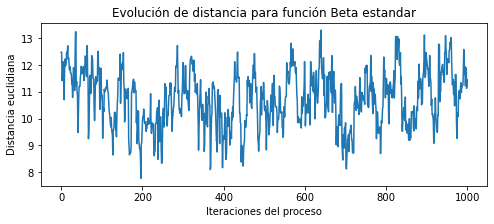

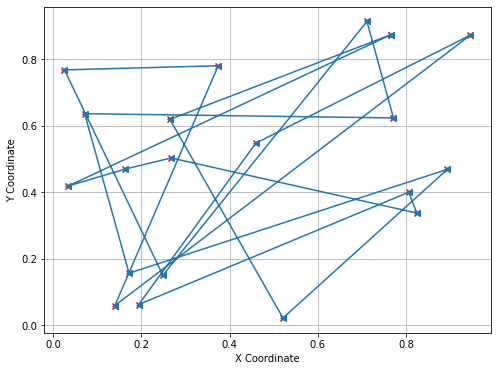

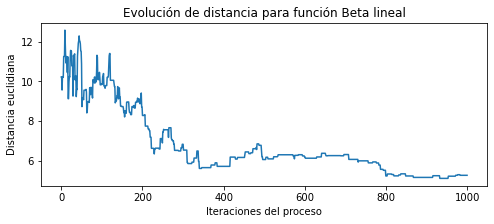

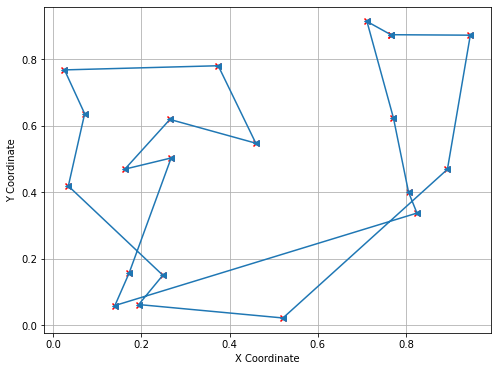

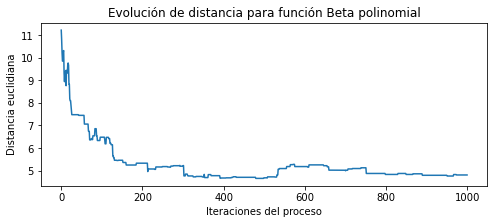

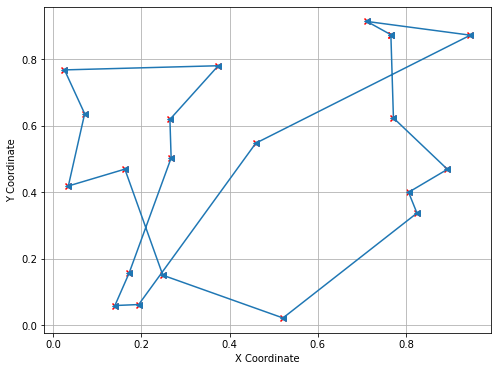

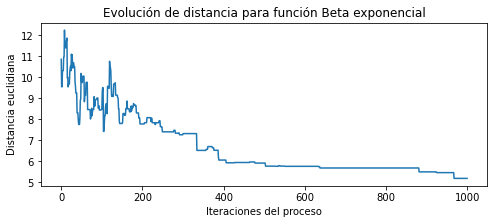

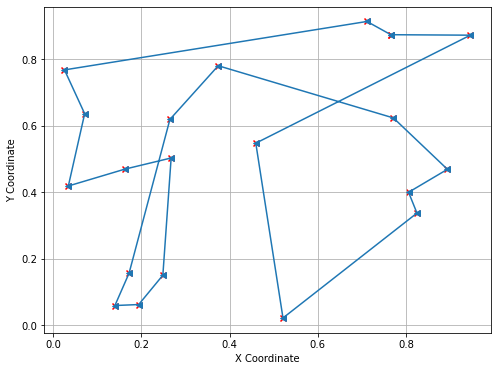

In [44]:
from matplotlib.pyplot import figure

fig, ax = plt.subplots(1, figsize=(8, 3))
plot_func(cadena_normal[0],1000,"estandar")
travel_plot(cadena_normal[1],20,ciudad_b,distancia_b)

fig, ax = plt.subplots(1, figsize=(8, 3))
plot_func(cadena_lin[0],1000,"lineal")
travel_plot(cadena_lin[1],20,ciudad_b,distancia_b)

fig, ax = plt.subplots(1, figsize=(8, 3))
plot_func(cadena_polin[0],1000,"polinomial")
travel_plot(cadena_polin[1],20,ciudad_b,distancia_b)

fig, ax = plt.subplots(1, figsize=(8, 3))
plot_func(cadena_exp[0],1000,"exponencial")
travel_plot(cadena_exp[1],20,ciudad_b,distancia_b)